# Real-World Project 2

Begin this project in Week 5 and turn it in for feedback in Discussions by Sunday (11:59 PM) in Week 6. Respond to two of your colleagues by Thursday (11:59 PM) of Week 7 and finally turn in your project on Sunday (11:59 PM) of week 7.

If you are working in Google Colab, you will need to upload your data files, using the file icon on the left. If you are working in Jupyter Lab, be sure your data files are in the folder that you are using.

Note that in this Jupyter notebook, I have included some figures. If you click on the figure, it will look like a *very* long list of characters. Just go back out of editing mode to see the picture.




In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])



# Linear Regression Using Least Squares Approximation
-------------------------------------------------------------------------
This is adapted from section 8.4 of our text, *Essential Math*

You can use least square approximation to find a line fitting data
points. In this hands-on project, you’ll learn how to go from data to a
matrix equation, which will allow you to use linear algebra on your data
and approximate a solution for linear regression problems.

### Linear Regression Using the Normal Equation

The normal equation is an equation used to find an analytical solution
for linear regression, as an alternative to gradient descent, which you did in your last project.

Let’s say that you have two-dimensional data on which you want to fit a
line. The goal is to find the parameters of this best-fitting line.
Let’s call the slope $\theta_0$ (pronounced “theta zero”), and the
$y$-intercept $\theta_1$ (pronounced “theta one”).

In this first part, you’ll take only a few data points to easily
understand how you can convert a data problem into a linear algebra
equation.

Take the following three two-dimensional data points:

-   A: (0, 0)
-   B: (1, 2)
-   C: (2, 1)

Let’s plot these data points. You have a $x$ vector with the values 0, 1
and 2, and a $y$-vector with the values 0, 2 and 0.

This gives us the two vectors as $${\bf x} = [x_1, x_2, x_3] \mbox{ and } {\bf y} = [y_1, y_2, y_3 ]$$
where the data points are $$(x_1, y_1)=(0,0), (x_2, y_2)=(1,2), (x_3, y_3)=(2,1)$$

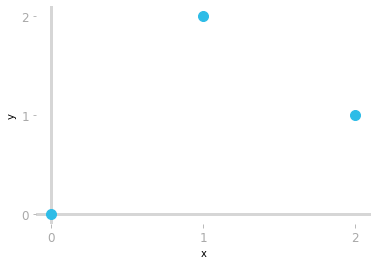

In [2]:
x = np.array([0, 1, 2])
y = np.array([0, 2, 1])

plt.scatter(x, y)
# [...] Add axes, styles etc.

# Assure that ticks are displayed with a step equal to 1
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()



Figure 1: Scatter plot of the example data points.

The goal is to find the line passing by these data points. The equation
of this line is:

$$
y=\theta_0 x + \theta_1
$$

The first step is to understand how this problem is related to systems
of linear equations.

Start with an hypothetical perfect solution: let’s say that there is a
line passing by all the data points (even if it is not possible). In
this case, the first data sample is on the line, meaning that the $x$
and $y$ values of this data point (which are 0 and 0) satisfy the
equation of your line ${\bf y}=\theta_0 {\bf x} + \theta_1 {\bf b}$.

Replacing these values in the equation, you have:

$$
\begin{aligned}
0 &= \theta_0 \cdot 0 + \theta_1
\end{aligned}
$$

If you proceed identically with the second point, you have:

$$
2 = \theta_0 \cdot 1 + \theta_1
$$

and for the third point:

$$
1 = \theta_0 \cdot 2 + \theta_1
$$

With these equations, you have a system of
equations. You can see that the unknowns $\theta_0$ and $\theta_1$ are
the parameters of the line. You can write the system as follows:

$$
\begin{cases}
0 &= 0 \cdot \theta_0 + \theta_1 \\\\
2 &= 1 \cdot \theta_0 + \theta_1 \\\\
1 &= 2 \cdot \theta_0 + \theta_1
\end{cases}
$$

Or under the matrix form:

$$
\begin{bmatrix}
    0 & 1 \\\\
    1 & 1 \\\\
    2 & 1
\end{bmatrix}
\begin{bmatrix}
    \theta_0 \\\\
    \theta_1
\end{bmatrix}
= \begin{bmatrix}
    0 \\\\
    2 \\\\
    1
\end{bmatrix}
$$

Note that you need to add a column of 1's to represent the $y$-intercept.  That is because the coefficients of $\theta_1$ are all equal to 1.

# Question 1

Explain why there is no solution to the above system of linear equations.


# Answer question 1 here.

The system of linear equations lacks a solution due to the positioning of the target vector b which is [0,2,1]. Vector b falls beyond the scope of matrix A's column space. This indicates that the target vector b lies outside by matrix A's linear combinations or by encompassing space as the points in matrix A blends. 





Also, ***remember that***, since there is no line passing by all the data
points, this system has no solution. You’ll need to find ***an
approximation*** $\hat{\bf x}$.

Let’s use the notation $A {\bf x} = {\bf b}$ with $A$ being the matrix of coefficients,
${\bf x}$ the unknowns ($\theta_0$ and $\theta_1$) and $\bf b$ the solution:

We have

$$
A=\begin{bmatrix}
    0 & 1 \\\\
    1 & 1 \\\\
    2 & 1
\end{bmatrix}
$$

$$
{\bf x}=\begin{bmatrix}
    \theta_0 \\\\
    \theta_1
\end{bmatrix}
$$

and

$$
{\bf b}=\begin{bmatrix}
    0 \\\\
    2 \\\\
    1
\end{bmatrix}
$$


You can now use the normal equation (from section 8.3.4 in the text) to approximate a solution $\hat {\bf x}$. As you
saw, you have

$$  A^{\text{T}}  A ~ \hat{ \bf x} = A^{\text{T}} ~ {\bf b} $$



and thus:

$$
\hat{\bf x} = (A^{\text{T}}A)^{-1}A^{\text{T}} {\bf b}
$$


# Question 2

Explain why the matrix $A^{\text{T}} A $ is invertible, in this particular example. And, in this example, what are the dimensions of $(A^{\text{T}}A)^{-1} A^{\text{T}}$? Explain your answer.

# Answer for question 2.

Since the determinant is non-zero ($\text{det}(A^{\text{T}}A) \neq 0$), the matrix $A^{\text{T}}A$ is invertible. This property is crucial because it guarantees the existence of a unique solution when solving the normal equation.

# **************

\begin{bmatrix}We know that 
$(A^{\text{T}}A)^{-1}$ exists.

The expression $(A^{\text{T}}A)^{-1}A^{\text{T}}$ is one way to
calculate what is called the *Moore-Penrose inverse*, or *pseudoinverse*
of the matrix $A$. The pseudoinverse is a generalization of the
inverse. It is denoted as $A^+$. 

Notice that if a matrix $B$ is invertible then $(B^{\text{T}}B)^{-1} B^{\text{T}} = B^{-1} (B^{\text T})^{-1}B^{\text T} = B^{-1} $ and that is why it is called a *pseudoinverse*.

Another way to calculate the pseudoinverse is to calculate the Singular
Value Decomposition (SVD) of $A$ (that you’ll see in
Section 10), which is
the method used by the Numpy function `np.linalg.inv()` (as documented
here:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html\#numpy.linalg.pinv).

Let’s calculate $\hat{\bf x}$:

$$

\begin{aligned}
\hat{\bf x} &= (A^{\text{T}}A)^{-1}A^{\text{T}}{\bf b} \\\\
\hat{\bf x} &= 
    0.5 & -0.5 \\\\
    -0.5 & 0.83
\end{bmatrix}
\begin{bmatrix}
    0 & 1 & 2 \\\\
    1 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
    0 \\\\
    2 \\\\
    1
\end{bmatrix}
\end{aligned}
$$

# Question 3 part a.

Use numpy to calculate the value of $\hat {\bf x}$ and print out its value. Use its value to conclude what the slope and y-intercept of the best fit line is.


In [3]:
# Answer question 3.a here. Find x_hat

# Definying the matrices and vectors
#A
A = np.array([[0, 1], [1, 1], [2, 1]])

#b
b = np.array([[0], [2], [1]])

# Calculate the pseudoinverse of A
pseudoinverse_A = np.linalg.pinv(A)

# Calculating the solution vector x_hat
x_hat = pseudoinverse_A @ b

print("The solution vector x_hat:")
print(x_hat)

# Extracting the slope and y-intercept from x_hat
slope = x_hat[1][0]
y_intercept = x_hat[0][0]

print("\nSlope:", slope)
print("Y-intercept:", y_intercept)



The solution vector x_hat:
[[0.5]
 [0.5]]

Slope: 0.5
Y-intercept: 0.49999999999999994



# Q3 part b.
What is the slope and y-intercept?

#Answer question 3.b here.

slope = 0.5
y-intercept = 0.49999 ~ 0.5

# Question 4

Plot this regression line using the normal equation along with the data points. Use the code from the previous plot and plot the line on top of it.

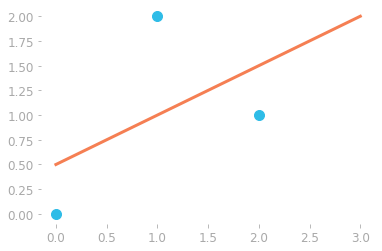

In [4]:
# Answer Question 4 here.
#Regression line using the normal equation

x= np.array([0,1,2])
y= np.array([0,2,1])

x1= np.linspace(0,3,10)
y1= 0.5*x1 + 0.5

plt.scatter(x,y)
plt.plot(x1,y1, c='#F57F53')
plt.show()




Hopefully, the line above looks
good and you just implemented a linear regression using the normal
equation.

This shows an example of how linear algebra concepts as independence,
linear combinations, matrix product, column space, inverse of a matrix
etc., can be used to deeply understand a very common method: linear
regression using the normal equation.

# Food Data

Now, that you saw how to go from data to matrix equations, let’s use
least squares approximation with real data: the CIQUAL dataset on food
composition (french Agency for Food, Environmental and Occupational
Health & Safety. ANSES-CIQUAL French food composition table version
2017. Check out this website to better understand the dataset: https://ciqual.anses.fr/) .

You’ll use the normal equation to model the relationship between the
amount of phosphorus and zinc in vegetables and legumes.

Let’s start by loading the data. You'll need to download the file $\tt ciqual$.csv to your computer. You'll find it in the data folder that came with the text. Then upload it to Google Colab each time you work on the Jupyter notebook, or put it in the proper folder in your documents on your computer if you are using this notebook in Jupyter Lab.

Also, we'll look at the first few entries in the dataset.

In [5]:
# Load the data
data = pd.read_csv("ciqual.csv", sep=";", encoding="latin9", na_values=['-', 'NaN'])

#The following code shows the first 7 lines of the dataset along with the headings.
# It helps you see what you are dealing with.
data.head(7)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_eng,alim_ssgrp_nom_eng,alim_ssssgrp_nom_eng,alim_code,alim_nom_eng,alim_nom_eng.1,Energy. Regulation EU No 1169/2011 (kcal/100g),Energy. N x Jones' factor. with fibres (kJ/100g),Energy. N x Jones' factor. with fibres (kcal/100g),Water (g/100g),Protein (g/100g),Protein. crude. N x 6.25 (g/100g),Carbohydrate (g/100g),Fat (g/100g),Sugars (g/100g),Starch (g/100g),Fibres (g/100g),Polyols (g/100g),Ash (g/100g),Alcohol (g/100g),Organic acids (g/100g),FA saturated (g/100g),FA mono (g/100g),FA poly (g/100g),FA 4:0 (g/100g),FA 6:0 (g/100g),FA 8:0 (g/100g),FA 10:0 (g/100g),FA 12:0 (g/100g),FA 14:0 (g/100g),FA 16:0 (g/100g),FA 18:0 (g/100g),FA 18:1 n-9 cis (g/100g),FA 18:2 9c.12c (n-6) (g/100g),FA 18:3 c9.c12.c15 (n-3) (g/100g),FA 20:4 5c.8c.11c.14c (n-6) (g/100g),FA 20:5 5c.8c.11c.14c.17c (n-3) EPA (g/100g),FA 22:6 4c.7c.10c.13c.16c.19c (n-3) DHA (g/100g),Cholesterol (mg/100g),Salt (g/100g),Calcium (mg/100g),Chloride (mg/100g),Copper (mg/100g),Iron (mg/100g),Iodine (µg/100g),Magnesium (mg/100g),Manganese (mg/100g),Phosphorus (mg/100g),Potassium (mg/100g),Selenium (µg/100g),Sodium (mg/100g),Zinc (mg/100g),Retinol (µg/100g),Beta-carotene (µg/100g),Vitamin D (µg/100g),Vitamin E (mg/100g),Vitamin K1 (µg/100g),Vitamin K2 (µg/100g),Vitamin C (mg/100g),Vitamin B1 or Thiamin (mg/100g),Vitamin B2 or Riboflavin (mg/100g),Vitamin B3 or Niacin (mg/100g),Vitamin B5 or Pantothenic acid (mg/100g),Vitamin B6 (mg/100g),Vitamin B9 or Folate (µg/100g),Vitamin B12 (µg/100g)
0,1,101,0,starters and dishes,mixed salads,NaN,25600,Celeriac in remoulade sauce. prepacked,Celeriac in remoulade sauce. prepacked,NaN,NaN,NaN,78.5,1.12,1.12,4.19,12.8,2.38,1.3,2.87,0,1.59,0,NaN,1.08,7.73,3.67,< 0.05,< 0.05,< 0.05,< 0.05,< 0.05,0.013,0.66,0.22,4.64,1.69,1.03,NaN,NaN,< 0.01,0.1,1,28.6,616,0.069,0.29,2,12,0.11,35,315,< 10,395,0.22,< 2,< 8,< 0.5,3.4,NaN,NaN,25.2,< 0.04,< 0.04,0.38,0.28,0.19,28,< 0.08
1,1,101,0,starters and dishes,mixed salads,NaN,25601,Prepared mixed tuna and vegetable salad. canne...,Prepared mixed tuna and vegetable salad. canne...,NaN,NaN,NaN,76.5,9.15,9.15,7.74,4.7,3.08,4.1,2.7,0,1.79,0,NaN,0.56,1.83,1.76,< 0.05,< 0.05,< 0.05,< 0.05,< 0.05,0.008,0.38,0.12,NaN,1.15,0.056,NaN,0.008,0.039,19.2,1.11,20.7,731,0.1,1.1,2,25.1,0.1,88.4,232,NaN,445,0.6,< 2,NaN,< 0.5,1.6,NaN,NaN,2.75,< 0.04,0.053,4.45,< 0.16,0.29,31,1.45
2,1,101,0,starters and dishes,mixed salads,NaN,25602,Prepared mixed meat/fish canned. drained salad,Prepared mixed meat/fish canned. drained salad,NaN,NaN,NaN,76.7,8.06,8.06,6.4,5.3,1.9,3.3,2,0,1.5,0,NaN,0.16,3.27,1.54,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,0.12,0.04,2.24,1.08,0.28,0.016,0.016,0.15,15.2,0.95,22,584,0.07,0.7,< 20,20,0.1,92,220,30,381,0.38,< 21,781,0.44,2.04,9.75,NaN,NaN,0.032,0.022,4.13,0.2,0.12,11.1,1.23
3,1,101,0,starters and dishes,mixed salads,NaN,25605,Greek-style marinated mushrooms,Greek-style marinated mushrooms,NaN,NaN,NaN,84.6,2.08,2.08,3.95,3.55,2.38,0.28,2.35,0,1.64,0,NaN,0.23,1.74,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026,NaN,NaN,NaN,0.11,1.26,22.6,NaN,0.17,0.58,1.91,13.8,0.13,52.2,292,1.79,500,0.39,0,747,0,1.47,NaN,NaN,10.3,0.062,0.2,1.88,0.76,0.11,27.3,0.018
4,1,101,0,starters and dishes,mixed salads,NaN,25606,Prepared potatoes salad. home-made,Prepared potatoes salad. home-made,NaN,NaN,NaN,76,2.68,2.68,9.9,8.2,NaN,NaN,1.3,0,1.95,0,NaN,1.43,2.48,3.74,NaN,NaN,NaN,0,0.011,0.013,1.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,68,1.33,19,NaN,0.12,0.65,NaN,15,0.1,52,254,NaN,529,0.31,29,36,0,NaN,NaN,NaN,10,0.077,0.06,0.89,0.53,0.14,7,0
5,1,101,0,starters and dishes,mixed salads,NaN,25608,Tabbouleh. prepacked,Tabbouleh. prepacked,NaN,NaN,NaN,66.4,4.29,4.29,22.2,5.65,3.82,13,2.27,0,1.23,0,NaN,0.6,3.3,1.27,< 0.05,< 0.05,< 0.05,< 0.05,< 0.05,0.005,0.38,0.11,NaN,1.03,0.23,< 0.0026,< 0.0026,< 0.0026,0.1,0.91,19.9,NaN,0.12,0.72,2,27.1,0.3,66.5,207,< 10,355,0.46,0,NaN,0,1.68,NaN,NaN,14.5,0.09,0.04,0.83,NaN,0.09,17,0
6,1,101,0,starters and dishes,mixed salads,NaN,25609,Po

Let's look at the data more closely. This gives the count of entries, number of columns, number of non-null entries in each column and their data type.

In [6]:
# Some initial exploration of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 69 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   alim_grp_code                                       2807 non-null   int64  
 1   alim_ssgrp_code                                     2807 non-null   int64  
 2   alim_ssssgrp_code                                   2807 non-null   int64  
 3   alim_grp_nom_eng                                    2796 non-null   object 
 4   alim_ssgrp_nom_eng                                  2796 non-null   object 
 5   alim_ssssgrp_nom_eng                                1764 non-null   object 
 6   alim_code                                           2807 non-null   int64  
 7   alim_nom_eng                                        2806 non-null   object 
 8   alim_nom_eng.1                                      2806 non-null   object 
 9

Let’s remove non-numeric characters in the data and convert the columns
to numeric type.

In [7]:
data = data.replace("< ", "", regex=True).replace('traces', 0)
cols = data.loc[:, data.columns != 'alim_ssssgrp_nom_eng'].columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

Now, you’ll select only part of the dataset you’ll need for the linear
regression. Then, remove the missing values:

In [8]:
food = ['vegetables. raw',
       'vegetables. cooked', 'vegetables. dried or dehydrated',
       'legumes. cooked', 'legumes. raw', 'legumes. dried',
       'fresh fruits']

data = data[['alim_ssssgrp_nom_eng', "Phosphorus (mg/100g)", "Zinc (mg/100g)"]]
data = data[(data['alim_ssssgrp_nom_eng'].isin(food))]

data = data.dropna()

data

,alim_ssssgrp_nom_eng,Phosphorus (mg/100g),Zinc (mg/100g)
308,vegetables. raw,44.4,0.460
309,vegetables. raw,10.0,0.070
310,vegetables. raw,32.7,0.220
311,vegetables. raw,85.6,0.650
312,vegetables. raw,37.5,0.610
...,...,...,...
659,fresh fruits,19.0,0.130
660,fresh fruits,17.0,0.080
661,fresh fruits,9.8,0.050
662,fresh fruits,15.8,0.086


# Bonus Question  4.5

In the above 2 snippets of code, various elements of the data are used. Explain where you can find these values. For instance, how do we know what some of the entries are under the header $\tt alim\_ssssgrp\_nom\_eng$. How do we know the non-numeric characters "<" and "traces" exist as entries?

# Answer bonus question 4.5 here. 

The names are specific to the dataset so for header 𝚊𝚕𝚒𝚖⎯𝚜𝚜𝚜𝚜𝚐𝚛𝚙⎯𝚗𝚘𝚖⎯𝚎𝚗𝚐 its a numeric codes representing different levels of food group categorization. The non-numeric characters "<" and "traces" are present in the columns where numeric values are expected, indicating values that are below the limit of detection or negligible. The provided code replaces "<" with an empty string to remove it and replaces "traces" with the numeric value 0.

# ******
Now, let’s visualize a scatter plot of the amount of zinc as a function
of the amount of phosphorus (Figure
[156](#fig:ch09_output_zinc_phosphorus)):

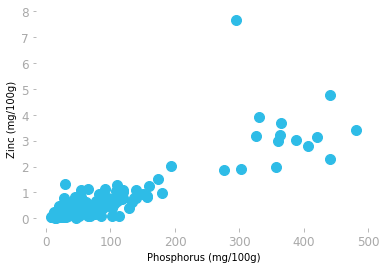

In [9]:
plt.scatter(data["Phosphorus (mg/100g)"], data["Zinc (mg/100g)"])
# [...] Add labels

plt.xlabel("Phosphorus (mg/100g)")
plt.ylabel("Zinc (mg/100g)")
plt.show()



Figure 3: Amount of zinc as a function of the amount of phosphorus.

You can then create the matrix and vectors corresponding to the equation
$ A {\bf x} = {\bf b}$ (the function `to_numpy()` allows you to convert Pandas
Series to Numpy arrays):

In [10]:
x = data["Phosphorus (mg/100g)"].to_numpy()
b = data["Zinc (mg/100g)"].to_numpy()

A = np.array([x, np.ones(x.shape[0])]).T
A

array([[44.4,  1. ],
       [10. ,  1. ],
       [32.7,  1. ],
       ...,
       [ 9.8,  1. ],
       [15.8,  1. ],
       [32.6,  1. ]])

Now, use the normal equation to calculate $\hat{x}$:

In [11]:
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b
x_hat

array([ 0.0084948 , -0.05865873])

You can check that it works by plotting the regression line:

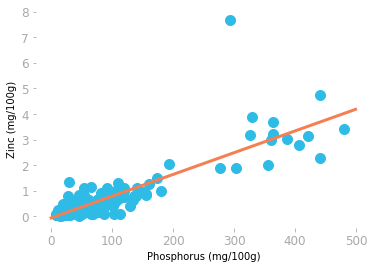

Correlation coefficient: 0.8619538009745912


In [12]:
# Regression line representing the relationship between amount of zinc and phosphorus.
x_axis = np.arange(0, 500)
y_line = x_hat[0] * x_axis + x_hat[1]

plt.scatter(data["Phosphorus (mg/100g)"].to_numpy(), data["Zinc (mg/100g)"].to_numpy())
plt.plot(y_line, c="#F57F53")
# [...] Add labels

plt.xlabel("Phosphorus (mg/100g)")
plt.ylabel("Zinc (mg/100g)")
plt.show()

correlation = data["Phosphorus (mg/100g)"].astype(float).corr(data["Zinc (mg/100g)"].astype(float))
print("Correlation coefficient:", correlation)





You can see in Figure above
that the line fits the data well.

# Question 5

Now that you have the regression line, explain what is the meaning of it relative to the elements: alim_ssssgrp_nom_eng	Phosphorus (mg/100g)	Zinc (mg/100g). How can you use this regression line? What information does it provide? Compute the correlation and compare and contrast it with what you see in the above scatterplot with the regression line passing through it.

# Answer Question 5 here.

The regression line represents the linear relationship between phosphorus and zinc content. It shows the average change in zinc content for a unit change in phosphorus content. If the line slopes upwards, it indicates a positive correlation between the two nutrients. If it slopes downwards, it indicates a negative correlation. The slope (x_hat[0]) represents the change in zinc content for a one-unit increase in phosphorus content, and the intercept (x_hat[1]) represents the expected zinc content when phosphorus content is zero. You can use the regression line to make predictions about the zinc content based on phosphorus content. For a given phosphorus value, you can estimate the corresponding zinc value using the equation of the regression line. The correlation coefficient is 0.8619538009745912


# Question 6

Multiple linear regression. This time, choose 3 new elements of the dataset ciqual.csv. Two independent variables an one dependent variable. The idea is to use the two independent variables to predict the value of the dependent variable.
Complete all of the above steps to find and plot the linear regression model (which will be a plane) of the data, graph the scatterplot in three dimentions with the plane  and finally, draw a conclusion about your result.

You might want to [watch this video first](https://youtu.be/xVgqM35YSDY).

In [13]:
data = pd.read_csv("ciqual.csv", sep=";", encoding="latin9", na_values=['-', 'NaN'])

data.head(7)


,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_eng,alim_ssgrp_nom_eng,alim_ssssgrp_nom_eng,alim_code,alim_nom_eng,alim_nom_eng.1,Energy. Regulation EU No 1169/2011 (kcal/100g),Energy. N x Jones' factor. with fibres (kJ/100g),Energy. N x Jones' factor. with fibres (kcal/100g),Water (g/100g),Protein (g/100g),Protein. crude. N x 6.25 (g/100g),Carbohydrate (g/100g),Fat (g/100g),Sugars (g/100g),Starch (g/100g),Fibres (g/100g),Polyols (g/100g),Ash (g/100g),Alcohol (g/100g),Organic acids (g/100g),FA saturated (g/100g),FA mono (g/100g),FA poly (g/100g),FA 4:0 (g/100g),FA 6:0 (g/100g),FA 8:0 (g/100g),FA 10:0 (g/100g),FA 12:0 (g/100g),FA 14:0 (g/100g),FA 16:0 (g/100g),FA 18:0 (g/100g),FA 18:1 n-9 cis (g/100g),FA 18:2 9c.12c (n-6) (g/100g),FA 18:3 c9.c12.c15 (n-3) (g/100g),FA 20:4 5c.8c.11c.14c (n-6) (g/100g),FA 20:5 5c.8c.11c.14c.17c (n-3) EPA (g/100g),FA 22:6 4c.7c.10c.13c.16c.19c (n-3) DHA (g/100g),Cholesterol (mg/100g),Salt (g/100g),Calcium (mg/100g),Chloride (mg/100g),Copper (mg/100g),Iron (mg/100g),Iodine (µg/100g),Magnesium (mg/100g),Manganese (mg/100g),Phosphorus (mg/100g),Potassium (mg/100g),Selenium (µg/100g),Sodium (mg/100g),Zinc (mg/100g),Retinol (µg/100g),Beta-carotene (µg/100g),Vitamin D (µg/100g),Vitamin E (mg/100g),Vitamin K1 (µg/100g),Vitamin K2 (µg/100g),Vitamin C (mg/100g),Vitamin B1 or Thiamin (mg/100g),Vitamin B2 or Riboflavin (mg/100g),Vitamin B3 or Niacin (mg/100g),Vitamin B5 or Pantothenic acid (mg/100g),Vitamin B6 (mg/100g),Vitamin B9 or Folate (µg/100g),Vitamin B12 (µg/100g)
0,1,101,0,starters and dishes,mixed salads,NaN,25600,Celeriac in remoulade sauce. prepacked,Celeriac in remoulade sauce. prepacked,NaN,NaN,NaN,78.5,1.12,1.12,4.19,12.8,2.38,1.3,2.87,0,1.59,0,NaN,1.08,7.73,3.67,< 0.05,< 0.05,< 0.05,< 0.05,< 0.05,0.013,0.66,0.22,4.64,1.69,1.03,NaN,NaN,< 0.01,0.1,1,28.6,616,0.069,0.29,2,12,0.11,35,315,< 10,395,0.22,< 2,< 8,< 0.5,3.4,NaN,NaN,25.2,< 0.04,< 0.04,0.38,0.28,0.19,28,< 0.08
1,1,101,0,starters and dishes,mixed salads,NaN,25601,Prepared mixed tuna and vegetable salad. canne...,Prepared mixed tuna and vegetable salad. canne...,NaN,NaN,NaN,76.5,9.15,9.15,7.74,4.7,3.08,4.1,2.7,0,1.79,0,NaN,0.56,1.83,1.76,< 0.05,< 0.05,< 0.05,< 0.05,< 0.05,0.008,0.38,0.12,NaN,1.15,0.056,NaN,0.008,0.039,19.2,1.11,20.7,731,0.1,1.1,2,25.1,0.1,88.4,232,NaN,445,0.6,< 2,NaN,< 0.5,1.6,NaN,NaN,2.75,< 0.04,0.053,4.45,< 0.16,0.29,31,1.45
2,1,101,0,starters and dishes,mixed salads,NaN,25602,Prepared mixed meat/fish canned. drained salad,Prepared mixed meat/fish canned. drained salad,NaN,NaN,NaN,76.7,8.06,8.06,6.4,5.3,1.9,3.3,2,0,1.5,0,NaN,0.16,3.27,1.54,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,< 0.01,0.12,0.04,2.24,1.08,0.28,0.016,0.016,0.15,15.2,0.95,22,584,0.07,0.7,< 20,20,0.1,92,220,30,381,0.38,< 21,781,0.44,2.04,9.75,NaN,NaN,0.032,0.022,4.13,0.2,0.12,11.1,1.23
3,1,101,0,starters and dishes,mixed salads,NaN,25605,Greek-style marinated mushrooms,Greek-style marinated mushrooms,NaN,NaN,NaN,84.6,2.08,2.08,3.95,3.55,2.38,0.28,2.35,0,1.64,0,NaN,0.23,1.74,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026,NaN,NaN,NaN,0.11,1.26,22.6,NaN,0.17,0.58,1.91,13.8,0.13,52.2,292,1.79,500,0.39,0,747,0,1.47,NaN,NaN,10.3,0.062,0.2,1.88,0.76,0.11,27.3,0.018
4,1,101,0,starters and dishes,mixed salads,NaN,25606,Prepared potatoes salad. home-made,Prepared potatoes salad. home-made,NaN,NaN,NaN,76,2.68,2.68,9.9,8.2,NaN,NaN,1.3,0,1.95,0,NaN,1.43,2.48,3.74,NaN,NaN,NaN,0,0.011,0.013,1.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,68,1.33,19,NaN,0.12,0.65,NaN,15,0.1,52,254,NaN,529,0.31,29,36,0,NaN,NaN,NaN,10,0.077,0.06,0.89,0.53,0.14,7,0
5,1,101,0,starters and dishes,mixed salads,NaN,25608,Tabbouleh. prepacked,Tabbouleh. prepacked,NaN,NaN,NaN,66.4,4.29,4.29,22.2,5.65,3.82,13,2.27,0,1.23,0,NaN,0.6,3.3,1.27,< 0.05,< 0.05,< 0.05,< 0.05,< 0.05,0.005,0.38,0.11,NaN,1.03,0.23,< 0.0026,< 0.0026,< 0.0026,0.1,0.91,19.9,NaN,0.12,0.72,2,27.1,0.3,66.5,207,< 10,355,0.46,0,NaN,0,1.68,NaN,NaN,14.5,0.09,0.04,0.83,NaN,0.09,17,0
6,1,101,0,starters and dishes,mixed salads,NaN,25609,Po

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 69 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   alim_grp_code                                       2807 non-null   int64  
 1   alim_ssgrp_code                                     2807 non-null   int64  
 2   alim_ssssgrp_code                                   2807 non-null   int64  
 3   alim_grp_nom_eng                                    2796 non-null   object 
 4   alim_ssgrp_nom_eng                                  2796 non-null   object 
 5   alim_ssssgrp_nom_eng                                1764 non-null   object 
 6   alim_code                                           2807 non-null   int64  
 7   alim_nom_eng                                        2806 non-null   object 
 8   alim_nom_eng.1                                      2806 non-null   object 
 9

In [15]:
data = data.replace("< ", "", regex=True).replace('traces', 0)
cols = data.loc[:, data.columns != 'alim_ssssgrp_nom_eng'].columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

In [16]:

food = ['vegetables. raw',
       'vegetables. cooked', 'vegetables. dried or dehydrated',
       'legumes. cooked', 'legumes. raw', 'legumes. dried',
       'fresh fruits']

data = data[['alim_ssssgrp_nom_eng', "Carbohydrate (g/100g)", "Sugars (g/100g)", "Starch (g/100g)"]]
data = data[(data['alim_ssssgrp_nom_eng'].isin(food))]

data = data.dropna()

data

,alim_ssssgrp_nom_eng,Carbohydrate (g/100g),Sugars (g/100g),Starch (g/100g)
308,vegetables. raw,3.67,1.00,2.100
309,vegetables. raw,0.50,0.50,0.350
310,vegetables. raw,6.45,5.42,0.800
311,vegetables. raw,1.88,1.43,0.000
313,vegetables. raw,4.50,3.49,0.000
...,...,...,...,...
650,fresh fruits,7.60,4.04,0.000
658,fresh fruits,6.20,6.20,0.000
661,fresh fruits,11.20,11.20,0.350
662,fresh fruits,4.30,4.30,0.000


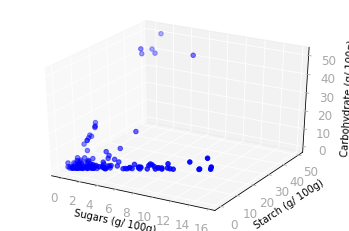

In [23]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Sugars (g/100g)'], data["Starch (g/100g)"], data["Carbohydrate (g/100g)"], color='blue', label='Data')


ax.set_xlabel('Sugars (g/ 100g)')
ax.set_ylabel('Starch (g/ 100g)')
ax.set_zlabel('Carbohydrate (g/ 100g)')

plt.show()

In [22]:
x = data["Sugars (g/100g)"].to_numpy()
b = data["Starch (g/100g)"].to_numpy()

A = np.array([x, np.ones(x.shape[0])]).T
A

array([[ 1.  ,  1.  ],
       [ 0.5 ,  1.  ],
       [ 5.42,  1.  ],
       ...,
       [11.2 ,  1.  ],
       [ 4.3 ,  1.  ],
       [ 6.97,  1.  ]])

In [19]:
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b
x_hat

array([0.10070029, 2.95575416])

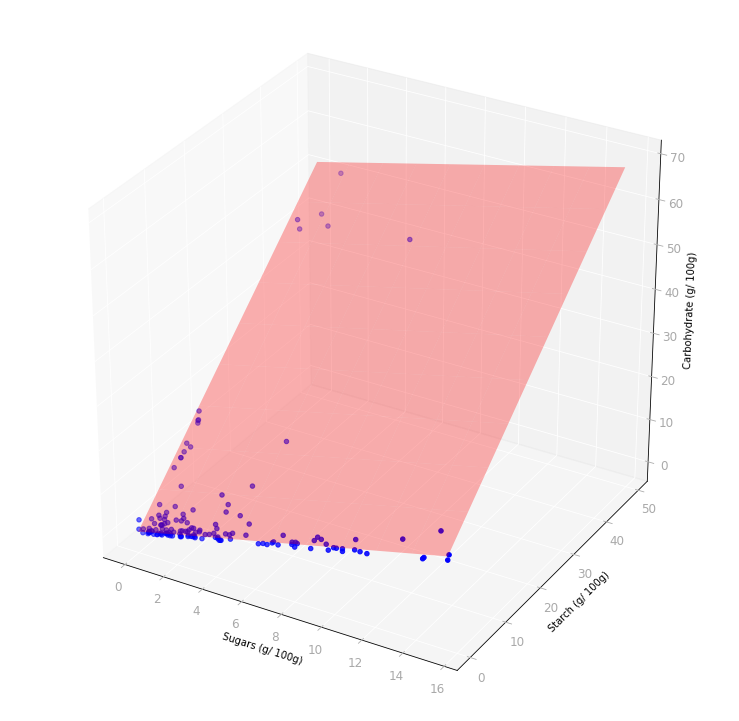

In [20]:

#vectors of the independent variables
sug=data['Sugars (g/100g)']
starch=data['Starch (g/100g)']

#matrix of independent variables and constant offset column for B0
X_b = np.c_[np.ones((len(sug), 1)), sug, starch]

#dependent variable vector
b = data["Carbohydrate (g/100g)"].to_numpy()

#theta
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ b

from sklearn.linear_model import LinearRegression

#linear regression model
model = LinearRegression()
model.fit(X_b, b)

#grid for the regression plane
xx, yy = np.meshgrid(np.linspace(sug.min(), sug.max(), 10), np.linspace(starch.min(), starch.max(), 10))
zz = theta[0] + theta[1] * xx + theta[2] * yy

#plot 
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sug, starch, b, color='blue', label='Data')
ax.plot_surface(xx, yy, zz, alpha=0.3, color='red')


ax.set_xlabel('Sugars (g/ 100g)')
ax.set_ylabel('Starch (g/ 100g)')
ax.set_zlabel('Carbohydrate (g/ 100g)')

plt.show()